In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

#Stop warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
data = pd.read_csv('Clothing_Store.csv')

dummies = pd.get_dummies(data[['VALPHON']],  drop_first=True)
data=data.join(dummies)

del data['VALPHON']
final_train = data.sample(frac=0.6, random_state=450411920)
final_test = data[data.index.isin(final_train.index)==False]
#Now we have final train/test which only has predictors whilst y_train/test are the response
y_train = final_train.pop('RESP')
y_test = final_test.pop('RESP')


### Going to try out some models here

You can see more information about the models I use in this: http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

In [3]:
#In order to store the results from our models
pred = []
method = []
model = []

In [4]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(final_train,y_train)
predneigh = neigh.predict(final_test)
pred.append(predneigh)
method.append('KNN')

In [5]:
#Adaptive Boosting
regr = AdaBoostClassifier(learning_rate = 1, n_estimators = 350)
model.append(regr)
regr = regr.fit(final_train,y_train)
adapred = regr.predict(final_test)
pred.append(adapred)
method.append('AdaptiveBoost')

In [6]:
#Quadratic Discriminant analysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(final_train, y_train)
predQDA = QDA.predict(final_test)
pred.append(predQDA)
method.append('QDA')

In [7]:
#Linear Discriminant analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(final_train, y_train)
predLDA = LDA.predict(final_test)
pred.append(predLDA)
method.append('LDA')


In [8]:
#Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(final_train,y_train)
predDT = DT.predict(final_test)
pred.append(predDT)
method.append('Decision Tree')

In [9]:
#Random Forest 
RandomFor = RandomForestClassifier(max_depth=None,min_samples_split=2)
model.append(RandomFor)
RandomFor = RandomFor.fit(final_train,y_train)
randomforpred = RandomFor.predict(final_test)
pred.append(randomforpred)
method.append('Random Forest')

In [10]:
#Extremely Random Forest
Extratree = ExtraTreesClassifier(max_depth=None,min_samples_split=2)
model.append(Extratree)
Extratree = Extratree.fit(final_train,y_train)
predFinalExtRandomForest = Extratree.predict(final_test)
pred.append(predFinalExtRandomForest)
method.append('Extreme Random Forest')

In [11]:
#Gradient Boosting Classifier
GradBoost = GradientBoostingClassifier(n_estimators=350, learning_rate=0.1,
                                 max_depth=1, random_state=0)
model.append(GradBoost)
GradBoost = GradBoost.fit(final_train,y_train)
predGradBoost = GradBoost.predict(final_test)
pred.append(predGradBoost)
method.append('Gradient Boost')

In [12]:
#Naive Bayes
NaiveB = GaussianNB()
model.append(NaiveB)
NaiveB = NaiveB.fit(final_train, y_train)
predNaiveB = NaiveB.predict(final_test)
pred.append(predNaiveB)
method.append('Naive Bayes')

In [13]:
#Logistic regression
LogReg = LogisticRegression(random_state=450411920)
model.append(LogReg)
LogReg = LogReg.fit(final_train,y_train)
predLogReg = LogReg.predict(final_test)
pred.append(predLogReg)
method.append('Logit Reg')

We can evaluate how each of our model performs from a confusion matrix.
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

In [14]:
#Generates us a table for results
def getResultTable(rows, predictions):
    columns=['Accuracy for Yes', 'Accuracy for No', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
        
    return results.round(3)

In [15]:
getResultTable(method,pred)

/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


,Accuracy for Yes,Accuracy for No,Overall Accuracy
KNN,0.836,0.200,0.789
AdaptiveBoost,0.876,0.594,0.850
QDA,0.902,0.391,0.782
LDA,0.868,0.606,0.849
Decision Tree,0.876,0.381,0.794
Random Forest,0.864,0.580,0.844
Extreme Random Forest,0.860,0.576,0.843
Gradient Boost,0.871,0.655,0.855
Naive Bayes,0.834,0.224,0.830
Logit Reg,0.833,NaN,0.833


In [16]:
#If we want to actually see a confusion matrix
maxscore = 0
bestmodel = 'none'
for prediction, name in zip(pred,method):
    print('{} confusion matrix is:'.format(name))
    matrix = confusion_matrix(y_test, prediction)
    print(matrix)
    print('Accuracy of predicting Yes is %.3f'%(matrix[0][0]/(matrix[0][0]+matrix[1][0])))
    print('Accuracy of predicting No is %.3f'%(matrix[1][1]/(matrix[0][1]+matrix[1][1])))
    print('Overall accuracy is %.3f' % (accuracy_score(y_test, prediction)))
    print('')
    if (accuracy_score(y_test,prediction)>maxscore):
        maxscore = accuracy_score(y_test,prediction)
        bestmodel = name

print('Best model is {}'.format(bestmodel))
print('Accuracy of the model is %.3f' %(maxscore))
    #8696 is total observations

KNN confusion matrix is:
[[6738  509]
 [1322  127]]
Accuracy of predicting Yes is 0.836
Accuracy of predicting No is 0.200
Overall accuracy is 0.789

AdaptiveBoost confusion matrix is:
[[6928  319]
 [ 982  467]]
Accuracy of predicting Yes is 0.876
Accuracy of predicting No is 0.594
Overall accuracy is 0.850

QDA confusion matrix is:
[[6007 1240]
 [ 653  796]]
Accuracy of predicting Yes is 0.902
Accuracy of predicting No is 0.391
Overall accuracy is 0.782

LDA confusion matrix is:
[[6995  252]
 [1062  387]]
Accuracy of predicting Yes is 0.868
Accuracy of predicting No is 0.606
Overall accuracy is 0.849

Decision Tree confusion matrix is:
[[6360  887]
 [ 902  547]]
Accuracy of predicting Yes is 0.876
Accuracy of predicting No is 0.381
Overall accuracy is 0.794

Random Forest confusion matrix is:
[[6996  251]
 [1103  346]]
Accuracy of predicting Yes is 0.864
Accuracy of predicting No is 0.580
Overall accuracy is 0.844

Extreme Random Forest confusion matrix is:
[[7023  224]
 [1145  304]]


/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


We can see that Gradient Boosting was the most accurate

To interpret a confusion matrix, the column 1 and 2 represent the model predicting Yes or No. Then the rows represent were they actually yes or no. The [0,0] entry means that we predicted that many to be Yes, and it turns out that we were correct in predicting those, so that tells us how many yes observations we predicted correctly. Likewise, the [1,1] entry means how many no's we predicted correctly. The bottom left, [1,0] entry means we predicted yes, but was actually no and [0,1] entry is the vice versa. Conclusively, the diagonals of the matrix tells us how accurate are our predictions

# Hyperparameter Tuning

Now we try to tune the hyperparameter in our models, we use this package called randomizedsearchcv.

This allows us to try out different hyperparameters.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [17]:
models = []
modelname = []

### KNN

We begin with KNN with inspiration from:

http://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

In [18]:
#Try setting from 1 - 25 neighbors
k_range = range(1, 25)

# we create a list. This allows us to see whether we should weigh all neighbours equally or weigh closer ones more
weight_options = ['uniform', 'distance']

In [19]:
#Creating the objects necessary for us to try cross-validation in order to locate best hyperparameters
param_dist = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [20]:
#Fitting the model and testing out random hyperparameters. This saves on computation time
knnopt = rand.fit(final_train, y_train)

In [21]:
# examine the best model
print('Accuracy of this model is %.3f'%rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)
models.append(knnopt)
modelname.append('KNN')

Accuracy of this model is 0.834
{'weights': 'uniform', 'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')


Best hyperparameters for KNN involves 22 neighbours and having uniform neighbours

In [22]:
#Now constructing a graph for this
k_range = range(1, 25)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, final_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7391884083841449, 0.8200690066610925, 0.79262347447833981, 0.82489923806123699, 0.81171339922396868, 0.82804305752590679, 0.82152594443765903, 0.83011278760604679, 0.82712304700344796, 0.83271991469292261, 0.83179966929414972, 0.83317968507783802, 0.83218322231512887, 0.83387010400323169, 0.83325660707071647, 0.83387010400323192, 0.83302666315918028, 0.83394690855795339, 0.83379365176298159, 0.83394690855795317, 0.83387033887954587, 0.83402359567451767, 0.83402359567451767, 0.83417673503133238]


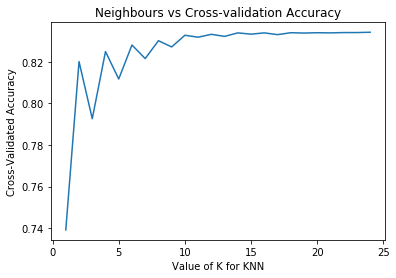

In [23]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Neighbours vs Cross-validation Accuracy')

We can see that increasing number of neighbours improves accuracy. However, we need to be wary of this.

### Decision Tree

In [24]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
treeopt = tree_cv.fit(final_train, y_train)


In [25]:
# examine the best model
print('Accuracy of this model is %.3f'%tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)
models.append(treeopt)
modelname.append('Decision Tree')

Accuracy of this model is 0.849
{'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 3, 'criterion': 'entropy'}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


For the decision tree, we should set min sample leaves to 5, have a maximum of 8 features, a max depth of 3, and using the gini criterion.

In [26]:
#Now constructing a graph for this
tree_range = range(2, 10)

# list of scores from t_range
t_scores = []

# 1. we will loop through reasonable values of k
for k in tree_range:
    # 2. run Decision tree with different value for depth of tree
    tree = DecisionTreeClassifier(max_depth = k, criterion='gini', max_features = 8, max_leaf_nodes = None )
    # 3. obtain cross_val_score for Decision tree with depth of k
    scores = cross_val_score(tree, final_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for decision tree to t_scores list
    t_scores.append(scores.mean())
print(t_scores)

[0.8467504861939702, 0.84682529430002162, 0.84866566765941054, 0.85042864927329265, 0.84966342224184732, 0.84299223029152837, 0.84261102603369076, 0.84184192354306209]


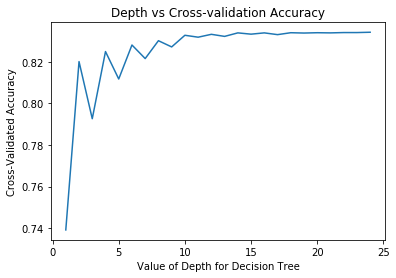

In [27]:
# plot the value of Depth for Decision Tree(x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Depth vs Cross-validation Accuracy')

### Random Forest

In [28]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9),
              }

# Instantiate a Extremely Random Forest classifier: randext
randFor = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: randFor_cv
randFor_cv = RandomizedSearchCV(randFor,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optrand = randFor_cv.fit(final_train, y_train)


In [29]:
# examine the best model
print('Accuracy of this model is %.3f'%randFor_cv.best_score_)
print(randFor_cv.best_params_)
print(randFor_cv.best_estimator_)
models.append(optrand)
modelname.append('Random Forest')

Accuracy of this model is 0.853
{'n_estimators': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Best hyperparameters:

n_estimators: 10

maximum features: 8

min_samples_split: 2

min_samples_leaf: 8

No maximum depth

### Extremely Random Forest

In [30]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9),
              }

# Instantiate a Extremely Random Forest classifier: randext
randExt = ExtraTreesClassifier()

# Instantiate the RandomizedSearchCV object: randext_cv
randExt_cv = RandomizedSearchCV(randExt,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optext = randExt_cv.fit(final_train, y_train)


In [31]:
# examine the best model
print('Accuracy of this model is %.3f'%randExt_cv.best_score_)
print(randExt_cv.best_params_)
print(randExt_cv.best_estimator_)
models.append(optext)
modelname.append('Extremely Random Forest')

Accuracy of this model is 0.850
{'n_estimators': 11, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 5, 'max_depth': None}
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


{'n_estimators': 11, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 5, 'max_depth': None} tells us the best parameters

### Adaptive Boosting

In [32]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(330,400,10),
              "learning_rate": range(1,5),
              }

# Instantiate a Adaptie boosting classifier: tree
randAda = AdaBoostClassifier()

# Instantiate the RandomizedSearchCV object: randada_cv
randAda_cv = RandomizedSearchCV(randAda,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optada = randAda_cv.fit(final_train, y_train)


In [33]:
# examine the best model
print('Accuracy of this model is %.3f'%randAda_cv.best_score_)
print(randAda_cv.best_params_)
print(randAda_cv.best_estimator_)
models.append(optada)
modelname.append('Adaptive Boosting')

Accuracy of this model is 0.852
{'n_estimators': 350, 'learning_rate': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=350, random_state=None)


### Gradient Boosting

In [34]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"loss": ["deviance", "exponential"],
              "n_estimators": range(250,550,50),
              "learning_rate": [0.1],
              "min_samples_split" : [2,4],
              "min_samples_leaf" : range(1,3)
              }

# Instantiate a GB boosting classifier: randGB
randGB = GradientBoostingClassifier()

# Instantiate the RandomizedSearchCV object: randGB_cv
randGB_cv = RandomizedSearchCV(randGB,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optgb = randGB_cv.fit(final_train, y_train)


In [35]:
# examine the best model
print('Accuracy of this model is %.3f'%randGB_cv.best_score_)
print(randGB_cv.best_params_)
print(randGB_cv.best_estimator_)
models.append(optgb)
modelname.append('Gradient Boosting')

Accuracy of this model is 0.856
{'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 2, 'loss': 'exponential', 'learning_rate': 0.1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


Same interpretation as usual

### We have finalised tuning our hyperparameters and therefore we can retrain our models to see final results

In [36]:
#Logistic regression
LogReg = LogisticRegression()
optlog = LogReg.fit(final_train,y_train)
models.append(optlog)
modelname.append('Logit')

#Naive Bayes
NaiveB = GaussianNB()
optnb = NaiveB.fit(final_train,y_train)
models.append(optnb)
modelname.append('Naive Bayes')

#Linear Discriminant analysis
LDA = LinearDiscriminantAnalysis()
optlda = LDA.fit(final_train,y_train)
models.append(optlda)
modelname.append('LDA')

#Quadratic Discriminant analysis
QDA = QuadraticDiscriminantAnalysis()
optqda = QDA.fit(final_train,y_train)
models.append(optqda)
modelname.append('QDA')

In [37]:
#Generates us a table for results with hyperparameter optimised models
def getResultTable2(rows, modelsUsed):
    columns=['Accuracy for Yes', 'Accuracy for No', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    predictions = []
    for clf in modelsUsed:
        pred = clf.predict(final_test)
        predictions.append(pred)
        
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
        
    return results.round(3)

In [38]:
#Warning, this takes a while to run!
getResultTable2(modelname, models)

/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


,Accuracy for Yes,Accuracy for No,Overall Accuracy
KNN,0.833,NaN,0.833
Decision Tree,0.846,0.686,0.842
Random Forest,0.859,0.676,0.850
Extremely Random Forest,0.861,0.649,0.850
Adaptive Boosting,0.876,0.594,0.850
Gradient Boosting,0.873,0.647,0.856
Logit,0.833,NaN,0.833
Naive Bayes,0.834,0.224,0.830
LDA,0.868,0.606,0.849
QDA,0.902,0.391,0.782


# Ensembles

## We can now combine our models in order to create even better models

### We have predictions from our models and we can take a majority vote to predict each observation. Here, we use a majority vote. Here, we assign each model as having a vote that is of equal importance.

In [39]:
ensemmodels = []
ensempredictions = []

Here, we take the 3 and 4 best models to create our model with hard voting

In [40]:
ensem = VotingClassifier(estimators=[('Adaptive', optada), ('DecisionTree', treeopt), ('GradientBoost', optgb)], voting='hard')
ensemmodels.append('Adaboost DecisionTree GradientBoost')

In [41]:
ensem1 = ensem.fit(final_train,y_train)
ensempred1 = ensem1.predict(final_test)
ensempredictions.append(ensempred1)

In [42]:
ensem2 = VotingClassifier(estimators=[('Adaptive', optada), ('DecisionTree', treeopt), ('GradientBoost', optgb), ('LDA', optlda)], voting='hard')
ensemmodels.append('Adaboost DecisionTree GradientBoost LDA')

In [43]:
ensem2 = ensem2.fit(final_train,y_train)
ensempred2 = ensem2.predict(final_test)
ensempredictions.append(ensempred2)

In [45]:
getResultTable(ensemmodels,ensempredictions)

,Accuracy for Yes,Accuracy for No,Overall Accuracy
Adaboost DecisionTree GradientBoost,0.871,0.655,0.856
Adaboost DecisionTree GradientBoost LDA,0.860,0.694,0.852


Now we use the best ensemble model and then try soft voting. Here, each base model gets a different weight
in their vote. We can use gridsearch CV to find optimal level of weighting for each model.

http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

In [69]:
finalensem = VotingClassifier(estimators=[('LDA', optada), ('ExtraTrees', Extratree), ('GradientBoost', GradBoost)], voting='soft', weights = [1,1,4])

In [70]:
finalensem.fit(final_train,y_train)

VotingClassifier(estimators=[('LDA', RandomizedSearchCV(cv=10, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distribution...         presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 4])

In [71]:
finalresults = finalensem.predict(final_test)

In [72]:
#Final results
print(accuracy_score(y_test, finalresults))

0.855450781969


Looks like hardvoting with Adaptive boosting, decision trees, and gradient boosting performed better.